<a href="https://colab.research.google.com/github/agterzis/Machine-Learning/blob/main/%CE%9C%CE%B7%CF%87%CE%B1%CE%BD%CE%B9%CE%BA%CE%AE_%CE%9C%CE%AC%CE%B8%CE%B7%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Βιβλιοθήκες

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [265]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [266]:
# First 5 lines of df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [267]:
# Statistical description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plot Variables

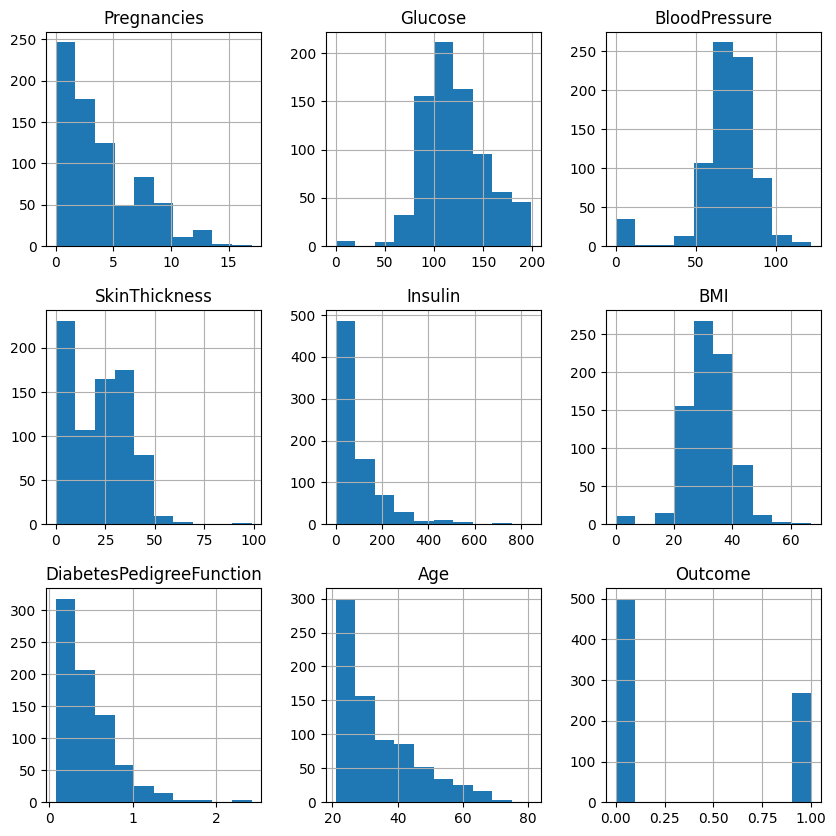

In [268]:
# Histogram
df.hist(figsize=(10, 10))
plt.show()

<Axes: xlabel='Outcome'>

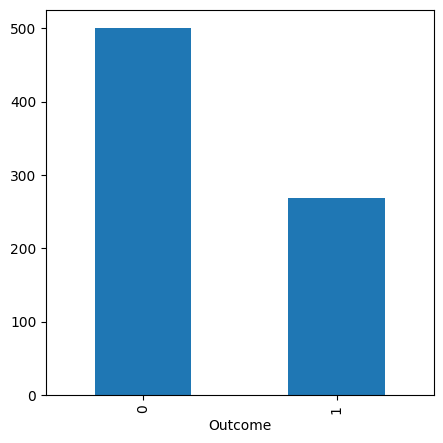

In [269]:
# Bar Plot
plt.figure(figsize=(5, 5))
df['Outcome'].value_counts().plot(kind='bar')

# Ερώτηση 2

*Q2) Θεωρείτε πως η ποιότητα των δεδομένων είναι καλή ή κακή? Αιτιολογείστε,
αξιοποιώντας τις πληροφορίες από ερώτημα (1). Δώστε τουλάχιστον 2 επιχειρήματα.*



Η ποιότητα των δεδομένων φαίνεται να μην είναι καλή.
α) Από τα ιστογράμματα φαίνεται οι δείκτες "Αρτηριακή πίεση", "Συγκέντρωση γλυκόζης." και "Δείκτης μάζας-σώματος" να έχουν μηδενικές τιμές σε ορισμένες εγγραφές. Αυτό είναι αδύνατο σε πραγματικά δεδομένα, οπότε λογικά οι τιμές αυτές φαίνεται να αρχικά να έλειπαν, άρα στην θέση τους μπήκε η τιμή 0.
Αυτό έχει σημασία για την εκπαίδευση του μοντέλου μας, καθώς αυτές οι τιμές θεωρούνται outliers(ακραιές) και μπορούν να επηρεάσουν την απόδοση του μοντέλου.

β) Οι τελικές τιμές (Outcome) φαίνονται να είναι σχεδόν διπλάσιες αρντητικές (0) από ότι θετικές(1). Αυτό μπορεί να επηρεάσει επίσης την απόδοση του μοντέλου μας, καθώς ίσως τείνει να φέρει αποτέλεσμα με αρνητική τιμή (0).



---



# Ερώτηση 3

*Q3) Τι κατανομή ακολουθεί η μεταβλητή Age? Είναι καλή η κατανομή αυτή για τη κατασκευή της συγκεκριμένης εφαρμογής? Αιτιολογείστε.*

Από το ιστόγραμμα της μεταβλητής Age, φαίνεται ότι οι περισσότερες εγγραφές είναι άνθρωποι με ηλικία κάτω των 30 χρονών και οι περισσότεροι να είναι γύρω στην ηλικία των 20.
Αυτό σημαίνει πως η κατανομή μας είναι κακή, αφού δεν υπάρχει ποικιλία δειγμάτων σε διαφορετικές ηλικιακές ομάδες. Επιπλέον, οι ηλικειωμένοι άνω των 60-70 ετών, που είναι μια ομάδα με μεγαλύτερο κίνδυνο για διαβήτη, δεν έχει πολλά δείγματα και αυτό θα κάνει το μοντέλο μας αναξιόπιστο.

#Διαβήτης για τιμές γλυκόζης

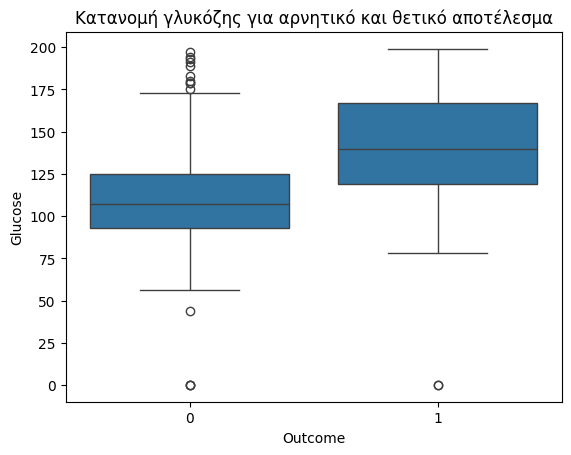

In [270]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Κατανομή γλυκόζης για αρνητικό και θετικό αποτέλεσμα')
plt.show()

In [271]:
# Μέσος όρος γλυκόζης για κάθε έξοδο
mean_glucose_outcome = df.groupby('Outcome')['Glucose'].mean()
mean_glucose_outcome

,Glucose
Outcome,
0,109.980000
1,141.257463


# Numpy arrays & Διαχωρισμός σε train και test sets

In [272]:
# Διαχωρισμός στήλης outcome και υπόλοιπων
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

In [273]:
from sklearn.model_selection import train_test_split

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(f"Πλήθoς δειγμάτων εκπαίδευσης: {len(x_train)}")
print(f"Πλήθος δειγμάτων testing: {len(x_test)}")


Πλήθoς δειγμάτων εκπαίδευσης: 537
Πλήθος δειγμάτων testing: 231


# Εκπαίδευση και αξιολόγηση μοντέλου

In [274]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [275]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [276]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_test_percentage = round(accuracy_test*100, 2)

print(f'Η ακρίβεια του test set είναι: {accuracy_test_percentage}')

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train_percentage = round(accuracy_train*100, 2)
print(f'Η ακρίβεια του train set είναι: {accuracy_train_percentage}')


Η ακρίβεια του test set είναι: 77.92
Η ακρίβεια του train set είναι: 76.54


Οι τιμές της ακρίβειας του test set και του train set φαίνεται να είναι πολύ κοντά. Αυτό σημαίνει ότι το μοντέλο μας δεν έχει κάνει υπερφόρτωση (overfitting) και προβλέπει καλά τα άγνωστα δεδομένα.

# Διαφορετικές ηλικιακές ομάδες


In [277]:
y_test_pred = model.predict(x_test)

age_index = 7
ages_test = x_test[:, age_index]

mask_0_25 = (ages_test <= 25)
mask_25_50 = (ages_test > 25) & (ages_test <= 50)
mask_gt_50 = (ages_test > 50)

# Υπολογισμός ακρίβειας για κάθε ομάδα
acc_0_25 = accuracy_score(y_test[mask_0_25], y_test_pred[mask_0_25])
acc_25_50 = accuracy_score(y_test[mask_25_50], y_test_pred[mask_25_50])
acc_gt_50 = accuracy_score(y_test[mask_gt_50], y_test_pred[mask_gt_50])

print(f"Ηλικία < 25: {acc_0_25 * 100:.2f}% (Σύνολο: {sum(mask_0_25)} άτομα)")
print(f"Ηλικία 25-50: {acc_25_50 * 100:.2f}% (Σύνολο: {sum(mask_25_50)} άτομα)")
print(f"Ηλικία > 50: {acc_gt_50 * 100:.2f}% (Σύνολο: {sum(mask_gt_50)} άτομα)")

Ηλικία < 25: 85.56% (Σύνολο: 90 άτομα)
Ηλικία 25-50: 70.00% (Σύνολο: 120 άτομα)
Ηλικία > 50: 90.48% (Σύνολο: 21 άτομα)


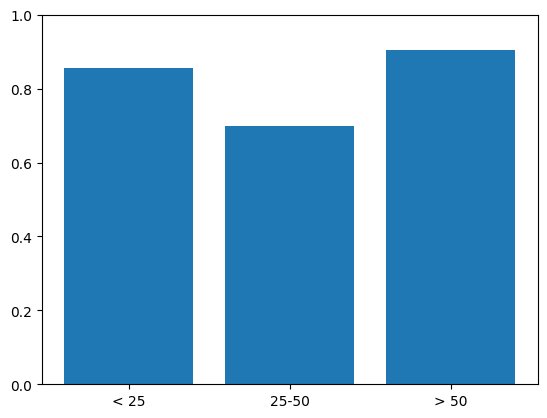

In [278]:
age_groups = ['< 25', '25-50', '> 50']
accuracies = [acc_0_25, acc_25_50, acc_gt_50]

plt.bar(age_groups, accuracies)
plt.ylim(0, 1)
plt.show()

# Ερώτηση 9

*Q8) Τι θεωρείτε πως είναι χειρότερο για τον ταξινομητή σας στη συγκεκριμένη εφαρμογή, να προβλέπει ότι κάποιος ασθενής έχει διαβήτη, χωρίς να έχει, ή ότι κάποιος ασθενής δεν έχει διαβήτη, ενώ έχει? Αιτιολογήστε.*



**Το μοντέλο είναι χειρότερο να προβλέψει ότι κάποιος ασθενής δεν έχει διαβήτη, ενώ στην πραγματικότητα έχει. Στον τομέα της υγείας είναι καλύτερο να γίνει μια τέτοια λανθασμένη πρόβλεψη και κάποιος να νομίζει ότι έχει διαβήτη, παρά κάποιος που έχει να μην το ξέρει!**

---



# Επαναλήψεις με για διαφορετικές τιμές του seed

In [279]:
test_accuracies = []

for seed in range(10):

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=seed
    )

    log_reg = LogisticRegression(solver='liblinear', random_state=seed, max_iter=1000)
    log_reg.fit(x_train, y_train)

    y_test_pred = log_reg.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Υπολογισμός μέσων όρων
mean_accuracy = np.mean(test_accuracies)
std_accuracy = np.std(test_accuracies)

print("Ακρίβειες (Test Set) για Seeds 0-9:")
print(test_accuracies)
print(f"\nΜέσος Όρος Ακρίβειας (Mean Accuracy): {mean_accuracy:.4f}")
print(f"Τυπική Απόκλιση Ακρίβειας (Standard Deviation): {std_accuracy:.4f}")


Ακρίβειες (Test Set) για Seeds 0-9:
[0.7835497835497836, 0.7748917748917749, 0.7359307359307359, 0.7445887445887446, 0.8095238095238095, 0.7878787878787878, 0.7748917748917749, 0.7619047619047619, 0.7792207792207793, 0.7316017316017316]

Μέσος Όρος Ακρίβειας (Mean Accuracy): 0.7684
Τυπική Απόκλιση Ακρίβειας (Standard Deviation): 0.0235


# Μέρος 2 – Γραμμική Παλινδρόμηση


In [280]:
X = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].values
y = df['Glucose'].values

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X, y, test_size=0.3, random_state=0
)

print(f"Πλήθος X_train: {len(X_train_lin)}")
print(f"Πλήθος X_test: {len(X_test_lin)}")

Πλήθος X_train: 537
Πλήθος X_test: 231


In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)

y_test_pred_lin = lin_reg.predict(X_test_lin)

mse = mean_squared_error(y_test_lin, y_test_pred_lin)
mae = mean_absolute_error(y_test_lin, y_test_pred_lin)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 929.89
MAE: 23.60


H MAE είναι η καταλληλότερη μετρική, καθώς μετρά το μέσο απόλυτο σφάλμα στην ίδια μονάδα με την γλυκόζη.  Οι γιατροί μπορούν να ερμηνεύσουν εύκολα το + ή - 23.60. Επίσης, το ΜΑΕ δεν είναι τόσο ευαίσθητο σε outliers σε σχέση με το MSE.

# Lasso Regression

In [282]:
from sklearn.linear_model import Lasso

alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
lasso_results = []

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, random_state=0, max_iter=10000)
    lasso_reg.fit(X_train_lin, y_train_lin)

    y_test_pred_lasso = lasso_reg.predict(X_test_lin)
    mae_lasso = mean_absolute_error(y_test_lin, y_test_pred_lasso)
    print(f"Alpha = {alpha:.2f} , MAE = {mae_lasso:.4f}")

Alpha = 0.20 , MAE = 23.5942
Alpha = 0.40 , MAE = 23.5884
Alpha = 0.60 , MAE = 23.5826
Alpha = 0.80 , MAE = 23.5768
Alpha = 1.00 , MAE = 23.5711
